<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **DBSCAN Implementation**


Parse training data

In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances as dist


In [2]:
def parse_data (infile, columns) -> np.array : 
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()[1:]

  dataset = []
  for line in lines:
    if line:
      features = line.split(',')
      datapoint_vector = []
      for c in columns:
        feature = float(features[c].strip('\'').strip('\"'))      
        datapoint_vector.append(feature)
          
      dataset.append(datapoint_vector)

  return np.array(dataset)

Neighbour Discovery with $O(n^2)$ complexity

In [3]:
def neighbours_discovery(dataset, epsilon) -> list :
  # distances matrix should be len(dataset) by len(dataset)
  distances = dist(dataset, dataset)
  # neigbours is a list of all neighbours 
  neighbours = []
  for i in range(dataset.shape[0]):
    data_i_neighbours = []
    for j in range(dataset.shape[0]):
      if distances[i][j] < epsilon:
        data_i_neighbours.append(j)
    neighbours.append(data_i_neighbours)
  return [distances, neighbours]

Use BFS to cluster

In [4]:
def bfs_dbscan ( neighbours, minPT) -> dict:
  scan ={
        'clusters': [], # a list of a list of datapoints
        'visited': set(), # a new set
        'noise': set() # non-leaf datapoints that don't have enough neighbours
    }  
  queue = set()
  visited = scan['visited']
  clusters = scan['clusters']
  noise = scan['noise']

  while (len(visited) != len(neighbours)):
    start = next(iter(set(range(0, len(neighbours))) - visited))
    queue.add(start)
    cluster = set()

    while (len(queue)!= 0):
      node = queue.pop()
      visited.add(node) ; cluster.add(node)
      for n in neighbours[node]:
        if (len(neighbours[n])>=minPT and (n not in visited)): 
          queue.add(n)
        else: 
          visited.add(n) ; cluster.add(n)
      if (len(queue) == 0 and len(cluster)>1) : clusters.append(cluster)
      elif (len(queue) == 0 and len(cluster)==1) : noise.update(cluster)

  return scan

Running DBScan on Toy Data Set


---
## **PROBLEM 1: DBSCAN on toy-neighborhood data**

You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3). 

You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset:
*   cluster originally empty, provided for your convenience pt a unique id for each data point
*  x point x-coordinate
*  y point y-coordinate
*   num neighbors number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within

As you can see, a tedious O(n^2) portion of the work has been done for you. 

Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work.



In [90]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/dbscan.csv', [2,3])

epsilon = 7.5

discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]

toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']

print(clusters)

[{0, 27}, {1, 66, 4, 40, 75, 12, 56, 28}, {5, 6, 8, 10, 11, 14, 16, 17, 19, 20, 21, 22, 25, 26, 29, 30, 31, 32, 34, 37, 38, 39, 42, 45, 46, 47, 48, 49, 50, 52, 53, 54, 60, 63, 64, 67, 68, 69, 70, 71, 72, 74, 76}, {9, 78, 33}, {51, 13}, {35, 62}, {59, 43}, {77, 55}]


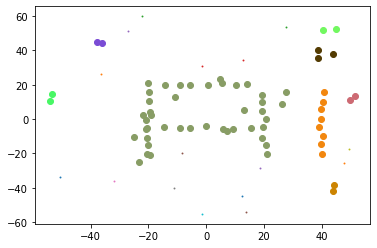

In [100]:
import matplotlib.pyplot as plt
import itertools

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)

---

## **PROBLEM 2: DBSCAN on toy raw data**

Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. Run your own implementaion of DBSCAN on these, in two phases.

---
### **Section A**
Run your own implementaion of DBSCAN on CIRCLES, in two phases.

In [107]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/circle.csv', [0,1])

epsilon = 0.1
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]



[{0, 1, 3, 4, 5, 9, 11, 12, 14, 16, 24, 25, 28, 30, 31, 32, 33, 35, 36, 38, 41, 42, 43, 45, 46, 49, 54, 55, 58, 60, 61, 67, 69, 70, 72, 74, 77, 78, 79, 83, 84, 85, 87, 89, 92, 94, 96, 99, 100, 101, 103, 105, 106, 107, 108, 111, 113, 116, 119, 120, 121, 123, 125, 128, 129, 131, 132, 133, 134, 135, 138, 139, 141, 142, 153, 154, 155, 158, 160, 161, 162, 163, 164, 167, 170, 171, 173, 175, 177, 178, 180, 181, 184, 185, 186, 188, 190, 191, 194, 195, 196, 198, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 219, 220, 221, 222, 226, 227, 230, 232, 233, 236, 238, 240, 244, 249, 251, 253, 255, 256, 258, 260, 261, 264, 265, 266, 270, 271, 274, 275, 276, 277, 280, 283, 284, 286, 287, 290, 292, 293, 294, 296, 297, 306, 307, 309, 310, 311, 312, 314, 321, 322, 327, 329, 330, 331, 333, 337, 339, 340, 349, 351, 353, 354, 355, 357, 358, 366, 370, 373, 376, 377, 380, 383, 384, 385, 386, 389, 390, 393, 398, 400, 402, 404, 405, 408, 409, 410, 412, 413, 420, 421, 423, 425, 426, 429, 430, 43

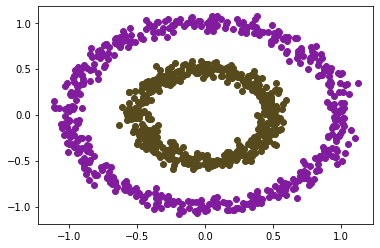

In [109]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)


---
### **Section B**
Run your own implementaion of DBSCAN on BLOBS, in two phases.

In [112]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/blobs.csv', [0,1])

epsilon = 0.4
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]


[{0, 3, 4, 5, 7, 8, 10, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 26, 30, 34, 36, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 54, 55, 56, 57, 59, 63, 64, 67, 69, 71, 73, 75, 76, 77, 78, 79, 83, 84, 85, 86, 90, 96, 97, 99, 100, 101, 102, 105, 106, 108, 109, 111, 113, 115, 118, 120, 121, 123, 124, 129, 131, 132, 133, 138, 140, 142, 144, 145, 147, 152, 153, 154, 155, 157, 166, 168, 169, 171, 173, 174, 175, 176, 177, 179, 180, 185, 186, 187, 189, 190, 191, 192, 194, 195, 196, 197, 199, 203, 204, 205, 206, 207, 208, 217, 218, 219, 221, 223, 225, 227, 228, 231, 233, 237, 242, 243, 245, 246, 247, 250, 251, 252, 253, 254, 255, 257, 259, 261, 262, 269, 270, 272, 276, 279, 282, 288, 289, 291, 292, 293, 294, 295, 296, 298, 300, 303, 304, 306, 309, 311, 313, 314, 315, 316, 322, 324, 330, 332, 333, 339, 341, 342, 343, 345, 350, 352, 354, 357, 358, 359, 361, 367, 370, 371, 377, 378, 382, 383, 384, 385, 387, 388, 393, 394, 396, 402, 404, 405, 406, 409, 410, 411, 412, 415, 416, 417, 419, 421, 422, 423, 

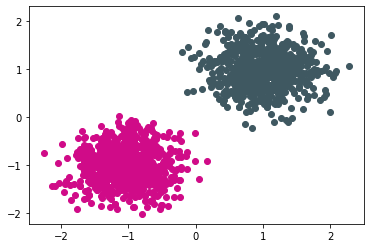

In [113]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)


---
### **Section C**
Run your own implementaion of DBSCAN on MOON, in two phases.

In [118]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/moons.csv', [0,1])

epsilon = 0.2
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]

[{0, 1, 3, 6, 7, 8, 13, 14, 15, 18, 20, 21, 22, 23, 27, 31, 36, 37, 38, 39, 43, 44, 45, 47, 52, 54, 56, 57, 60, 61, 63, 66, 68, 70, 71, 74, 75, 77, 78, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 102, 106, 107, 108, 110, 111, 112, 113, 116, 119, 120, 121, 122, 123, 124, 126, 127, 132, 134, 135, 136, 137, 139, 140, 141, 144, 145, 146, 147, 149, 150, 152, 157, 159, 161, 162, 168, 169, 170, 173, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 195, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 211, 212, 215, 218, 221, 222, 223, 224, 225, 228, 229, 230, 233, 234, 238, 241, 244, 247, 249, 251, 252, 256, 258, 260, 261, 263, 265, 268, 275, 277, 278, 285, 287, 289, 291, 292, 293, 295, 299, 300, 301, 302, 303, 304, 305, 306, 309, 311, 313, 314, 318, 319, 320, 324, 326, 327, 330, 333, 334, 337, 340, 341, 342, 348, 352, 353, 358, 360, 361, 363, 364, 368, 370, 371, 373, 375, 376, 377, 378, 379, 380, 382, 383, 384, 386, 387, 389, 396, 398, 401, 406, 41

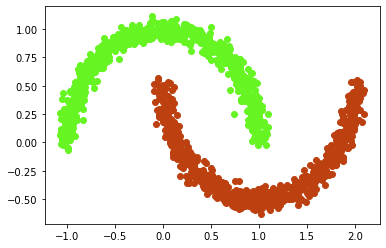

In [119]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)

---

## **PROBLEM 3: DBSCAN on real data**
Run the DBSCAN algorithm on the 20NG dataset, and on the FASHION dataset, and the HouseHold dataset (see papers), and evaluate results. 

You need to implement both phases (1) neighborhoods creation, (2) DBSCAN.

Explain why/when it works, and speculate why/when not. 

You need to do trial and error for parameters epsilon and MinPts

*   DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN
*   http://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf
*   DBSCAN Revisited:Mis-Claim, Un-Fixability, and Approximation
*   http://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/sigmod15-dbscan.pdf

EXTRA CREDIT: Using class labels (cheating), try to remove/add points in curate the set for better DBSCAN runs

---

## **PROBLEM 4: Hierarchical Clustering**

Use a library to execute hierarchical clustering on MNIST dataset, evaluate the clusters.